In [153]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [154]:
df = pd.DataFrame({
    'Name': [
        'Braund, Mr. Owen',
        'Allen, Mr. Will',
        'Bonnel, Miss Eliz'
    ],
    'Age': [22, 35, 58],
    'Sex': ['male', 'male', 'female']
})

df.head()

,Name,Age,Sex
0,"Braund, Mr. Owen",22,male
1,"Allen, Mr. Will",35,male
2,"Bonnel, Miss Eliz",58,female


In [155]:
df['Age']

0    22
1    35
2    58
Name: Age, dtype: int64

In [156]:
ages = pd.Series([22, 35, 58], name='Age')
ages

0    22
1    35
2    58
Name: Age, dtype: int64

In [157]:
df['Age'].max()

58

In [158]:
ages.max()

58

In [159]:
df.describe()

,Age
count,3.000000
mean,38.333333
std,18.230012
min,22.000000
25%,28.500000
50%,35.000000
75%,46.500000
max,58.000000


In [160]:
df.dtypes

Name    object
Age      int64
Sex     object
dtype: object

In [161]:
df.to_excel('people.xlsx', sheet_name='peeps', index=False)

In [162]:
df = pd.read_excel('people.xlsx', sheet_name='peeps')
df.head()

,Name,Age,Sex
0,"Braund, Mr. Owen",22,male
1,"Allen, Mr. Will",35,male
2,"Bonnel, Miss Eliz",58,female


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    3 non-null      object
 1   Age     3 non-null      int64 
 2   Sex     3 non-null      object
dtypes: int64(1), object(2)
memory usage: 200.0+ bytes


In [164]:
df.tail(1)

,Name,Age,Sex
2,"Bonnel, Miss Eliz",58,female


In [165]:
type(df['Age'])

pandas.core.series.Series

In [166]:
df['Age'].shape

(3,)

In [167]:
age_sex = df[['Age', 'Sex']]
age_sex

,Age,Sex
0,22,male
1,35,male
2,58,female


In [168]:
above_34_df = df[df['Age'] > 34]
above_34_df

,Name,Age,Sex
1,"Allen, Mr. Will",35,male
2,"Bonnel, Miss Eliz",58,female


----
`isin([...])` method for checking categorical values

as opposed to

`df['Sex'] == 'male'`

----
`isin()` is much more concise with multiple conditions

In [169]:
# returns boolean Series just like the other conditionals
df['Sex'].isin(['male'])

0     True
1     True
2    False
Name: Sex, dtype: bool

In [170]:
df[df['Sex'].isin(['male'])]

,Name,Age,Sex
0,"Braund, Mr. Owen",22,male
1,"Allen, Mr. Will",35,male


In [171]:
df[(df['Age'] == 22) | (df['Sex'] == 'female')]

,Name,Age,Sex
0,"Braund, Mr. Owen",22,male
2,"Bonnel, Miss Eliz",58,female


Nulls, NaNs, Nones, whatever you call them

In [172]:
df['Age'] = [22, 58, None]
df

,Name,Age,Sex
0,"Braund, Mr. Owen",22.0,male
1,"Allen, Mr. Will",58.0,male
2,"Bonnel, Miss Eliz",NaN,female


In [173]:
df[df['Age'].notna()]

,Name,Age,Sex
0,"Braund, Mr. Owen",22.0,male
1,"Allen, Mr. Will",58.0,male


In [174]:
df[df['Age'].isna()]

,Name,Age,Sex
2,"Bonnel, Miss Eliz",NaN,female


#### Row selection

- `.loc`: Select specific rows and/or columns using `loc` when using the **row and column names.**

- `.iloc`: Select specific rows and/or columns using `iloc` when using the **_indexes_** in the table.

**Makes sense! The `i` in `iloc` probably stands for _index_...**

In [175]:
# Give me rows where age > 27 and give me the name column: df.loc[row, col]
df.loc[df['Age'] > 27, 'Name']

1    Allen, Mr. Will
Name: Name, dtype: object

In [176]:
# format is still [row, col] with iloc
df.iloc[1, 1]

58.0

In [177]:
df

,Name,Age,Sex
0,"Braund, Mr. Owen",22.0,male
1,"Allen, Mr. Will",58.0,male
2,"Bonnel, Miss Eliz",NaN,female


In [178]:
# exclusive on upper bound (to be expected in python)
df.iloc[0:2, 1:]

,Age,Sex
0,22.0,male
1,58.0,male


In [179]:
df['Class'] = [1,2,3]

# make them all 1st class
df.iloc[:, 3] = 1
df

,Name,Age,Sex,Class
0,"Braund, Mr. Owen",22.0,male,1
1,"Allen, Mr. Will",58.0,male,1
2,"Bonnel, Miss Eliz",NaN,female,1


### Plotting
`pandas` uses `matplotlib` for plotting

In [180]:
import matplotlib.pyplot as plt

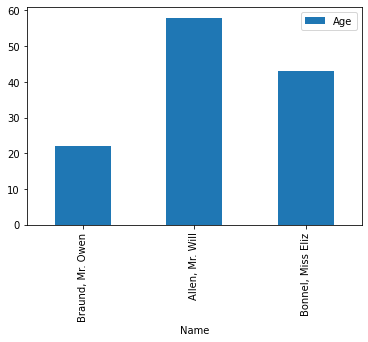

In [181]:
df.iloc[2,1] = 43

df.plot.bar(x='Name', y='Age')
plt.show()

### Creating Columns

In [182]:
import numpy as np

In [183]:
df['log(age)'] = np.log(df['Age'])
df

,Name,Age,Sex,Class,log(age)
0,"Braund, Mr. Owen",22.0,male,1,3.091042
1,"Allen, Mr. Will",58.0,male,1,4.060443
2,"Bonnel, Miss Eliz",43.0,female,1,3.761200


In [184]:
df['last_name'], df['first_name'] = df['Name'].str.split(',').str
df.rename(columns={'Name': 'full_name'}, inplace=True)
df

,full_name,Age,Sex,Class,log(age),last_name,first_name
0,"Braund, Mr. Owen",22.0,male,1,3.091042,Braund,Mr. Owen
1,"Allen, Mr. Will",58.0,male,1,4.060443,Allen,Mr. Will
2,"Bonnel, Miss Eliz",43.0,female,1,3.761200,Bonnel,Miss Eliz


In [185]:
# there were leading spaces that needed to be stripped
df['first_name'].str.strip().str.split(' ')

0     [Mr., Owen]
1     [Mr., Will]
2    [Miss, Eliz]
Name: first_name, dtype: object

In [186]:
df['honorific'], df['first_name'] = df['first_name'].str.strip().str.split(' ').str
df

,full_name,Age,Sex,Class,log(age),last_name,first_name,honorific
0,"Braund, Mr. Owen",22.0,male,1,3.091042,Braund,Owen,Mr.
1,"Allen, Mr. Will",58.0,male,1,4.060443,Allen,Will,Mr.
2,"Bonnel, Miss Eliz",43.0,female,1,3.761200,Bonnel,Eliz,Miss


In [188]:
df['sex_bool'] = df['Sex'] == 'male'
df

,full_name,Age,Sex,Class,log(age),last_name,first_name,honorific,sex_bool
0,"Braund, Mr. Owen",22.0,male,1,3.091042,Braund,Owen,Mr.,True
1,"Allen, Mr. Will",58.0,male,1,4.060443,Allen,Will,Mr.,True
2,"Bonnel, Miss Eliz",43.0,female,1,3.761200,Bonnel,Eliz,Miss,False


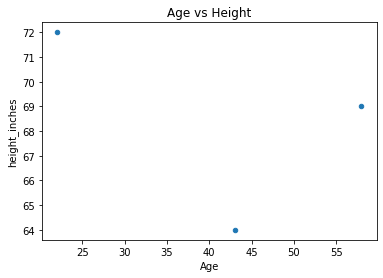

In [195]:
df['height_inches'] = [72, 69, 64]

df.sort_values(by='Age').plot.scatter(x='Age', y='height_inches')
plt.title('Age vs Height')
plt.show()

In [198]:
df['age_to_height'] = df['Age'] / df['height_inches']
df

,full_name,Age,Sex,Class,log(age),last_name,first_name,honorific,sex_bool,height_inches,age_to_height
0,"Braund, Mr. Owen",22.0,male,1,3.091042,Braund,Owen,Mr.,True,72,0.305556
1,"Allen, Mr. Will",58.0,male,1,4.060443,Allen,Will,Mr.,True,69,0.840580
2,"Bonnel, Miss Eliz",43.0,female,1,3.761200,Bonnel,Eliz,Miss,False,64,0.671875


### Summary Stats

In [199]:
df['Age'].mean()

41.0

In [200]:
df[['Age', 'height_inches']].median()

Age              43.0
height_inches    69.0
dtype: float64

In [201]:
df.describe()

,Age,Class,log(age),height_inches,age_to_height
count,3.000000,3.0,3.000000,3.000000,3.000000
mean,41.000000,1.0,3.637562,68.333333,0.606003
std,18.083141,0.0,0.496386,4.041452,0.273527
min,22.000000,1.0,3.091042,64.000000,0.305556
25%,32.500000,1.0,3.426121,66.500000,0.488715
50%,43.000000,1.0,3.761200,69.000000,0.671875
75%,50.500000,1.0,3.910822,70.500000,0.756227
max,58.000000,1.0,4.060443,72.000000,0.840580


In [205]:
df[['Sex', 'Age', 'height_inches']].groupby('Sex').mean()

,Age,height_inches
Sex,,
female,43.0,64.0
male,40.0,70.5


In [207]:
df.groupby('Sex').mean()

,Age,Class,log(age),sex_bool,height_inches,age_to_height
Sex,,,,,,
female,43.0,1.0,3.761200,False,64.0,0.671875
male,40.0,1.0,3.575743,True,70.5,0.573068


Frequency of a given value in a category; like a frequency distribution stored in a hash map

In [209]:
df['Sex'].value_counts()

male      2
female    1
Name: Sex, dtype: int64

### Joining tables
- Concatenating rows
- Joining with `merge()`

In [211]:
smaller_df = df[['first_name', 'Age', 'Sex']]
smaller_df

,first_name,Age,Sex
0,Owen,22.0,male
1,Will,58.0,male
2,Eliz,43.0,female


`pd.concat()`

In [212]:
extra_rows = pd.DataFrame({
    'first_name': ['John', 'Jill'],
    'Age': [19, 32],
    'Sex': ['male', 'female']
})

# axis=0 because we're adding rows, not columns here
concat_df = pd.concat([smaller_df, extra_rows], axis=0)
concat_df

,first_name,Age,Sex
0,Owen,22.0,male
1,Will,58.0,male
2,Eliz,43.0,female
0,John,19.0,male
1,Jill,32.0,female


In [224]:
location_df = pd.DataFrame({
    'first_name': ['Will', 'Jill', 'Owen', 'James'],
    'address': ['123 Ave.', '456 Lane', '789 Blvd.', '000 St.'],
    'state': ['CA', 'TX', 'Jalisco', 'BC'],
    'country': ['US', 'US', 'MX', 'CA']
})

In [225]:
# default is inner join
pd.merge(concat_df, location_df, on='first_name')

,first_name,Age,Sex,address,state,country
0,Owen,22.0,male,789 Blvd.,Jalisco,MX
1,Will,58.0,male,123 Ave.,CA,US
2,Jill,32.0,female,456 Lane,TX,US


In [226]:
pd.merge(concat_df, location_df, how='left', on='first_name')

,first_name,Age,Sex,address,state,country
0,Owen,22.0,male,789 Blvd.,Jalisco,MX
1,Will,58.0,male,123 Ave.,CA,US
2,Eliz,43.0,female,NaN,NaN,NaN
3,John,19.0,male,NaN,NaN,NaN
4,Jill,32.0,female,456 Lane,TX,US


In [227]:
pd.merge(concat_df, location_df, how='right', on='first_name')

,first_name,Age,Sex,address,state,country
0,Owen,22.0,male,789 Blvd.,Jalisco,MX
1,Will,58.0,male,123 Ave.,CA,US
2,Jill,32.0,female,456 Lane,TX,US
3,James,NaN,NaN,000 St.,BC,CA


In [228]:
pd.merge(concat_df, location_df, how='outer', on='first_name')

,first_name,Age,Sex,address,state,country
0,Owen,22.0,male,789 Blvd.,Jalisco,MX
1,Will,58.0,male,123 Ave.,CA,US
2,Eliz,43.0,female,NaN,NaN,NaN
3,John,19.0,male,NaN,NaN,NaN
4,Jill,32.0,female,456 Lane,TX,US
5,James,NaN,NaN,000 St.,BC,CA


### Time Series Data

In [268]:
air_quality = pd.read_csv("data/air_quality_no2_long.csv")

In [269]:
air_quality.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [270]:
air_quality = air_quality.rename(columns={"date.utc": "datetime"})

In [271]:
air_quality['city'].unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

In [272]:
# convert to datetime
air_quality['datetime'] = pd.to_datetime(air_quality['datetime'])
air_quality.head()

,city,country,datetime,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [273]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   city       2068 non-null   object             
 1   country    2068 non-null   object             
 2   datetime   2068 non-null   datetime64[ns, UTC]
 3   location   2068 non-null   object             
 4   parameter  2068 non-null   object             
 5   value      2068 non-null   float64            
 6   unit       2068 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 113.2+ KB


In [274]:
# alternatively
#pd.read_csv("data/air_quality_no2_long.csv", parse_dates=["datetime"])

In [275]:
# beginning & end of dataset?
air_quality['datetime'].min(), air_quality['datetime'].max()

(Timestamp('2019-05-07 01:00:00+0000', tz='UTC'),
 Timestamp('2019-06-21 00:00:00+0000', tz='UTC'))

In [276]:
air_quality['datetime'].max() - air_quality['datetime'].min()

Timedelta('44 days 23:00:00')

In [277]:
air_quality['month'] = air_quality['datetime'].dt.month
air_quality.head()

,city,country,datetime,location,parameter,value,unit,month
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,6
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,6
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,6
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,6
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,6


In [278]:
# What is the average No2 concentration for each day of the week for each of the measurement locations?
avg_per_weekday_per_station = air_quality.groupby([air_quality['datetime'].dt.weekday, 'location']).mean()
avg_per_weekday_per_station

value     month
datetime location                               
0        BETR801             27.875000  5.321429
         FR04014             24.856250  5.500000
         London Westminster  23.969697  5.454545
1        BETR801             22.214286  5.142857
         FR04014             30.999359  5.391026
         London Westminster  24.885714  5.342857
2        BETR801             21.125000  5.250000
         FR04014             29.165753  5.342466
         London Westminster  23.460432  5.323741
3        BETR801             27.500000  5.166667
         FR04014             28.600690  5.344828
         London Westminster  24.780142  5.326241
4        BETR801             28.400000  5.200000
         FR04014             31.617986  5.309353
         London Westminster  26.446809  5.326241
5        BETR801             33.500000  5.166667
         FR04014             25.266154  5.492308
         London Westminster  24.977612  5.500000
6        BETR801             21.896552  5.068966
         FR04014             23.274306  5.500000
         London Westminster  24.859155  5.492958

<AxesSubplot:xlabel='datetime,location'>

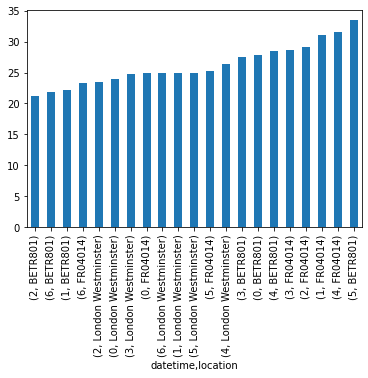

In [279]:
# can plot and analyze best & worst
avg_per_weekday_per_station['value'].sort_values().plot(kind='bar')

Using `datetime` as an index

In [280]:
air_quality.set_index('datetime', inplace=True)

`resample()` a time series to another frequency. These maxes may be incorrect, need to specify `values` somehow

In [282]:
monthly_max = air_quality.resample("M").max()
monthly_max.head()

,city,country,location,parameter,value,unit,month
datetime,,,,,,,
2019-05-31 00:00:00+00:00,Paris,GB,London Westminster,no2,97.0,µg/m³,5
2019-06-30 00:00:00+00:00,Paris,GB,London Westminster,no2,84.7,µg/m³,6


In [283]:
five_hour_max = air_quality.resample("5H").max()
five_hour_max.head()

,city,country,location,parameter,value,unit,month
datetime,,,,,,,
2019-05-07 00:00:00+00:00,Paris,GB,London Westminster,no2,61.9,µg/m³,5.0
2019-05-07 05:00:00+00:00,Paris,GB,London Westminster,no2,77.7,µg/m³,5.0
2019-05-07 10:00:00+00:00,Paris,GB,London Westminster,no2,21.0,µg/m³,5.0
2019-05-07 15:00:00+00:00,Paris,GB,London Westminster,no2,26.8,µg/m³,5.0
2019-05-07 20:00:00+00:00,Paris,GB,London Westminster,no2,36.2,µg/m³,5.0


### Text data

In [285]:
titanic = pd.read_csv("data/titanic.csv")

titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [286]:
titanic['Name'].str.lower()

0                                braund, mr. owen harris
1      cumings, mrs. john bradley (florence briggs th...
2                                 heikkinen, miss. laina
3           futrelle, mrs. jacques heath (lily may peel)
4                               allen, mr. william henry
                             ...                        
886                                montvila, rev. juozas
887                         graham, miss. margaret edith
888             johnston, miss. catherine helen "carrie"
889                                behr, mr. karl howell
890                                  dooley, mr. patrick
Name: Name, Length: 891, dtype: object

In [288]:
titanic[titanic['Name'].str.contains('Countess')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,B77,S


In [290]:
titanic['Name'].str.len()[:2]

0    23
1    51
Name: Name, dtype: int64

`idxmax()` is a nice method

In [291]:
titanic['Name'].str.len().idxmax()

307

In [292]:
# quite a long name
titanic['Name'][307]

'Penasco y Castellana, Mrs. Victor de Satode (Maria Josefa Perez de Soto y Vallejo)'

`replace()` method

In [294]:
titanic['sex_abbrev'] = titanic['Sex'].replace({
    'male': 'M', 
    'female': 'F'
})
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_abbrev
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,M
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,F
